# Gathering Data

### Gathering Tweet Image Predictions Data

In [93]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

% matplotlib inline

In [94]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [95]:
#create file for tweet image predictions
with open(os.path.join(url.split('/')[-1]), 
          mode = 'wb') as file: 
    file.write(response.content)

In [96]:
#read and load tweet image prediction file
Image = pd.read_csv('image-predictions.tsv', sep = '\t')

### Gathering Twitter Archive Data

In [97]:
#read and load the Twitter Archive
Archive = pd.read_csv('twitter-archive-enhanced.csv')

#first 5 rows
Archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1480,693486665285931008,NaN,NaN,2016-01-30 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He doesn't understand his new...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693486665...,11,10,Lincoln,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None


In [98]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Gathering Tweet Data via API

In [ ]:
#obtaining tweets from Twitter API and writing them to a tweet_json.txt
#Note that this code is dependent on API key code listed in the readme (removed for security reasons)
Tweet_Error = {}

with open('tweet_json.txt', 'w') as file:
    for i in Archive.tweet_id:
        try:
            tweet = api.get_status(i, tweet_mode = 'extended')
            file.write(json.dumps(tweet) + '\n')
            #json.dump(tweet, file)
            print(i)
        except Exception as e:
            Tweet_Error[i] = e
            print("Twitter ID {} not found. Message: {}".format(i, e))

In [99]:
J_attr = []
with open('tweet_json.txt') as f:
    for line in f:
        data = json.loads(line)
        J_attr.append({'tweet_id': data['id'],
                      'timestamp' : data['created_at'],
                      'retweets' : data['retweet_count'],
                      'favorites' : data['favorite_count'],
                     'followers' : data['user']['followers_count']})    


In [100]:
Api = pd.DataFrame(J_attr, columns = ['tweet_id', 'timestamp', 'retweets', 'favorites', 'followers'])
Api.head()

,tweet_id,timestamp,retweets,favorites,followers
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,7736,36361,8764297
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5728,31317,8764297
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3786,23599,8764297
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7900,39663,8764297
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,8521,37867,8764297


# Assessing Data

#### `Archive` Table

In [101]:
#look at the first 5 rows
Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [102]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [103]:
#look at summary
Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [104]:
#look at unique numerator rating
Archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [105]:
Archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [106]:
# this data will be reviewed in excel to assess rating accuracy based on the text column 
#for denominator not equal to 10 and very large numerator
Archive.query("rating_denominator != 10 | rating_numerator > 15")[['tweet_id','text', 'in_reply_to_user_id',
                                                                   'retweeted_status_id','rating_numerator', 
                                                                   'rating_denominator']]

,tweet_id,text,in_reply_to_user_id,retweeted_status_id,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,4.738443e+07,NaN,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,1.943518e+08,NaN,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,1.361572e+07,NaN,666,10
290,838150277551247360,@markhoppus 182/10,2.195506e+07,NaN,182,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,2.625958e+07,NaN,960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",NaN,7.867091e+17,75,10
342,832088576586297345,@docmisterio account started on 11/15/15,3.058208e+07,NaN,11,15
433,820690176645140481,The floofs have been released I repeat the flo...,NaN,NaN,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,75,10


In [107]:
# Invalid names are found
Archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Buddy             7
an                7
Bailey            7
Toby              7
Stanley           6
Jack              6
Dave              6
Bella             6
Rusty             6
Leo               6
Koda              6
Scout             6
Oscar             6
Jax               6
Milo              6
Louis             5
               ... 
Schnitzel         1
Mo                1
Moofasa           1
Emmie             1
Roscoe            1
Goliath           1
Boots             1
Lilli             1
Stuart            1
Kathmandu         1
Clarkus           1
Sparky            1
Comet             1
Durg              1
Alexanderson      1
Jeffrie           1
Jarod             1
Tanner            1
Kloey             1


In [108]:
# These values will be reviewed to look for invalid names
Archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [109]:
# counts of tweets which invalid name identified
Invalid_names = Archive.query("name in ['a', 'his', 'an', 'by', 'the', 'this']")
Invalid_names.name.value_counts()

a       55
the      8
an       7
by       1
his      1
this     1
Name: name, dtype: int64

In [110]:
Archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [111]:
Archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [112]:
Archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [113]:
#there are cases with multiple dog stage is selected due to either more than one dog in the tweet or errors
Archive.query('doggo == "doggo" & (pupper == "pupper" | puppo == "puppo")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None


#### `Image` Table for Image Predictions

In [114]:
#first 5 rows
Image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [115]:
Image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,1,vizsla,0.743216,True,redbone,0.217282,True,Rhodesian_ridgeback,0.028473,True
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
907,700462010979500032,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,1,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False


In [116]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [117]:
#percentage of tweet of dogs (assuming high level of confidence)
Image.p1_dog.mean()

0.7383132530120482

In [118]:
Image.p1_dog.mean() * Api.shape[0]

1721.0081927710844

In [119]:
#number of records with dog stage identify
Dog_stage = Archive.query('doggo == "doggo"').shape[0] + Archive.query('pupper == "pupper"').shape[0] + Archive.query('puppo == "puppo"').shape[0] +  Archive.query('floofer == "floofer"').shape[0]
Dog_stage

394

In [120]:
#low percentage of dog stage identify with more than 80% as None
Dog_stage/Archive.shape[0]

0.16723259762308998

In [121]:
#no duplicate tweets found
Image[Image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [122]:
Image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [123]:
#tweets in archive that did not run through the network for prediction
Archive.shape[0] - Image.shape[0]

281

In [124]:
#only 126 not predicted original tweet
Not_Predicted = Archive[~Archive.tweet_id.isin(Image.tweet_id)&Archive.retweeted_status_id.isnull()&Archive.in_reply_to_status_id.isnull()]
Not_Predicted.shape

(126, 17)

#### `Api` Table for Tweet Reaction

In [125]:
Api.sample(10)

,tweet_id,timestamp,retweets,favorites,followers
470,814530161257443328,Thu Dec 29 17:54:58 +0000 2016,1906,8832,8764302
1550,687480748861947905,Thu Jan 14 03:45:57 +0000 2016,240,1599,8764346
2142,669359674819481600,Wed Nov 25 03:39:17 +0000 2015,116,361,8764362
868,759557299618865152,Sun Jul 31 01:12:26 +0000 2016,1200,4753,8764307
621,793256262322548741,Tue Nov 01 01:00:05 +0000 2016,8581,20491,8764303
56,881268444196462592,Sat Jul 01 21:49:04 +0000 2017,4825,21875,8764297
393,823333489516937216,Mon Jan 23 00:56:15 +0000 2017,25,711,8764301
1746,678334497360859136,Sat Dec 19 22:02:01 +0000 2015,250,1297,8764348
949,750071704093859840,Mon Jul 04 21:00:04 +0000 2016,3368,7895,8764309
1110,728653952833728512,Fri May 06 18:33:34 +0000 2016,1031,3301,8764341


In [126]:
Api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null int64
timestamp    2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [127]:
Api.describe()

,tweet_id,retweets,favorites,followers
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,2715.436722,7592.875161,8.764338e+06
std,6.823170e+16,4593.578343,11782.566612,8.296986e+01
min,6.660209e+17,1.000000,0.000000,8.764297e+06
25%,6.782670e+17,548.000000,1326.500000,8.764303e+06
50%,7.182469e+17,1274.000000,3305.000000,8.764342e+06
75%,7.986692e+17,3154.000000,9299.000000,8.764349e+06
max,8.924206e+17,78200.000000,156933.000000,8.765088e+06


In [128]:
#no duplicate tweet found
Api[Api.tweet_id.duplicated()]

,tweet_id,timestamp,retweets,favorites,followers


In [129]:
# tweets in archive that may have been deleted
Archive.shape[0] - Api.shape[0]

25

## Quality Issues

`Archive` **Table:**
- Includes retweets and reply Twitters (only want original tweets)
- Only the decimal portion was extracted as numerator for ratings with decimals (normally for rating numerator greater than 15)
- Timestamp and retweeted_status_timestamp are objects instead of datetime
- Tweet ID are integers instead of objects
- A record have denominator rating of 0
- Some records are taking a date or fraction as the instead of the actual rating (normally for rating denominator is not 10)
- Invalid names such as 'a', 'his', 'an', 'by', 'the', 'this'
- Doggo, pupper, floofer, and puppo columns are not populated; Per prediction, over 70% of Tweets are dogs yet only 17% of these tweets have the dog stage identify (floofers were excluded since they are not mutually execulsive) **(can't clean yet)**

`Image` **Table:**
- Fix nondescriptive column headers (*p1*, *p1_conf*, *p1_dog* ... and also *p3_dog*)
- Missing 126 records of Original Tweets in Archive

`Api` **Table:**
- Timestamp is object instead of datetime
- Missing 25 records from Twitter ID due to tweet IDs in the archive may have been deleted
- Fix nondescriptive column header for follower (should be follower count of WeRateDogs at time of tweet)

## Tidiness Issues

- 2 columns of the `Archive` Table (rating_numerator, rating_denominator) are values of one variable (Rating)
- *p1*, *p1_conf*, *p1_dog* from `Image` Table (only the most confident image prediction) and *retweets*, *favorites*, *followers* from `Api` Table should be in `Archive` Table as they all naturally related to a tweet
- Once original tweets is isolate, columns regarding retweets, reply, url, and source is unneccessary for analysis

# Cleaning Data

In [130]:
# create a copy of the tables
Archive_clean = Archive.copy()
Image_clean = Image.copy()
Api_clean = Api.copy()

## Filtering Data

#### 1. `Archive` Table includes retweets and reply Twitters but analysis will only focus original tweets

#### *Define*

Drop records in the `Archive` where in_reply_to_status_id and retweeted_status_id is populated

#### *Code*

In [131]:
Archive_clean = Archive_clean[Archive_clean.in_reply_to_status_id.isnull() & Archive_clean.retweeted_status_id.isnull()]

#### Test

In [132]:
#should return no records
Archive_clean[Archive_clean.in_reply_to_status_id.notnull() & Archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidiness

#### 2. Columns in `Archive` Table regarding retweets, reply, url, and source is unneccessary for analysis

#### *Define*

Drop columns in the `Archive` Table regarding retweets, reply, url, and source not neccessary for analysis: 

#### *Code*

In [133]:
Archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls',
                              'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                   inplace = True)

#### Test

In [134]:
#confirm dropped columns are no longer present
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### 3. Essential columns from `Image` and `Api` Tables should be in `Archive` Table

#### *Define*

Merge the *p1*, *p1_conf*, *p1_dog* columns from `Image` Table to the `Archive` table, through an inner join on *tweet_id*. Merge *retweets*, *favorites*, *followers* from `Api` Table to `Archive` Table in the same method

#### *Code*

In [135]:
# Merge Image and Archive

Archive_clean = pd.merge(Archive_clean, Image_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog']], on=['tweet_id'])

In [136]:
#drop the duplicate timestamp from Api table
Api_clean.drop(columns = ['timestamp'], inplace=True)
# Merge Api and Archive
Archive_clean = pd.merge(Archive_clean, Api_clean, on=['tweet_id'])

#### Test

In [137]:
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
retweets              1964 non-null int64
favorites             1964 non-null int64
followers             1964 non-null int64
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 247.4+ KB


In [138]:
#confirm desired columns are merged
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
retweets              1964 non-null int64
favorites             1964 non-null int64
followers             1964 non-null int64
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 247.4+ KB


## Quality

#### 4. `Image` Table and `Api` Tables missing Tweet records found `Archive` Table

#### *Define*

`Image` and `Api` Table are no longer needed.

#### 5. Erroneous datatypes (*timestamp*, *retweeted_status_timestamp*, *tweet_id*) in `Archive` and `Api` Tables 

#### *Define*

Convert *timestamp* to datetime data type in `Archive` Table. Convert *tweet_id* to string. *retweeted_status_timestamp* and `Api` Table are no longer needed. 

#### *Code*

In [139]:
#convert timestamp
Archive_clean.timestamp = pd.to_datetime(Archive_clean.timestamp)

In [140]:
#convert tweet_id
Archive_clean.tweet_id = Archive_clean.tweet_id.astype(str)

#### Test

In [141]:
#confirm datatype changed as expected
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
retweets              1964 non-null int64
favorites             1964 non-null int64
followers             1964 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 247.4+ KB


#### 6. Fix nondescriptive column headers in `Image` and `Api` Tables 

#### *Define*

Select all nondescriptive column headers (*p1*, *p1_conf*, *p1_dog*, *followers*) that was merged from `Image` and `Api` to `Archive` Tables and replace them with clearer description (prediction, prediction_confidence, whether_dog, WeRateDogs_followers)

#### *Code*

In [142]:
#rename columns
Archive_clean = Archive_clean.rename(columns={'p1': 'prediction',
                                    'p1_conf': 'prediction_confidence',
                                    'p1_dog': 'whether_dog',
                                    'followers': 'WeRateDogs_followers'})

#### Test

In [143]:
#confirm column name change
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id                 1964 non-null object
timestamp                1964 non-null datetime64[ns]
text                     1964 non-null object
rating_numerator         1964 non-null int64
rating_denominator       1964 non-null int64
name                     1964 non-null object
doggo                    1964 non-null object
floofer                  1964 non-null object
pupper                   1964 non-null object
puppo                    1964 non-null object
prediction               1964 non-null object
prediction_confidence    1964 non-null float64
whether_dog              1964 non-null bool
retweets                 1964 non-null int64
favorites                1964 non-null int64
WeRateDogs_followers     1964 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 247.4+ KB


#### 7. Invalid names such as 'a', 'his', 'an', 'by', 'the', 'this' in `Archive` Table

#### *Define*

For the records with invalid names, identify records with the word 'named' in the *text* column and extract the next word. This would be the new name to replace the *name* column. The remaining records should be replaced with 'None'

#### *Code*

In [144]:
#isolate records with invalid name
Invalid_clean = Archive_clean.query("name in ['a', 'his', 'an', 'by', 'the', 'this']").copy()

In [145]:
#identify records with 'named' in the text column
Invalid_clean = Invalid_clean[Invalid_clean.text.str.contains('named')]
Invalid_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers
1479,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brookly...,10,10,a,None,None,None,None,English_springer,0.990300,True,93,630,8764350
1572,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip...,10,10,a,None,None,None,None,wombat,0.880257,False,346,1074,8764362
1651,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,a,None,None,None,None,toy_poodle,0.419427,True,228,726,8764362
1681,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. Thi...,9,10,a,None,None,None,None,Yorkshire_terrier,0.467202,True,205,647,8764362
1731,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork....,9,10,a,None,None,None,None,seat_belt,0.952258,False,154,508,8764362


In [146]:
#extract the name of dog
Invalid_clean.name = Invalid_clean.text.str.extract('[a-zA-Z0-9\s.+-,\']+named\s([a-zA-Z]+)', expand=True)
Invalid_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers
1479,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brookly...,10,10,Wylie,None,None,None,None,English_springer,0.990300,True,93,630,8764350
1572,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip...,10,10,Kip,None,None,None,None,wombat,0.880257,False,346,1074,8764362
1651,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,Jacob,None,None,None,None,toy_poodle,0.419427,True,228,726,8764362
1681,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. Thi...,9,10,Rufus,None,None,None,None,Yorkshire_terrier,0.467202,True,205,647,8764362
1731,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork....,9,10,Spork,None,None,None,None,seat_belt,0.952258,False,154,508,8764362
1740,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee...,9,10,Cherokee,None,None,None,None,platypus,0.974075,False,63,320,8764362
1743,670303360680108032,2015-11-27 18:09:09,This is a Speckled Cauliflower Yosemite named ...,9,10,Hemry,None,None,None,None,Shetland_sheepdog,0.380278,True,126,419,8764362
1761,669923323644657664,2015-11-26 16:59:01,This is a spotted Lipitor Rumpelstiltskin name...,10,10,Alphred,None,None,None,None,car_mirror,0.343063,False,53,228,8764362
1775,669564461267722241,2015-11-25 17:13:02,This is a Coriander Baton Rouge named Alfredo....,10,10,Alfredo,None,None,None,None,toy_poodle,0.623685,True,119,374,8764362
1803,668955713004314625,2015-11-24 00:54:05,This is a Slovakian Helter Skelter Feta named ...,10,10,Leroi,None,None,None,None,cocker_spaniel,0.367492,True,68,268,8764363


In [147]:
#update the names on Archive table
Archive_clean.update(Invalid_clean)
Archive_clean.reset_index(inplace = True)

In [148]:
#Update converted the int datetype to float. Converting back to int
Archive_clean.retweets = Archive_clean.retweets.astype(int)
Archive_clean.favorites = Archive_clean.favorites.astype(int)
Archive_clean.WeRateDogs_followers = Archive_clean.WeRateDogs_followers.astype(int)

In [149]:
#create list of invalid names
Invalid_list = ['a', 'his', 'an', 'by', 'the', 'this']

In [150]:
for phrase in Invalid_list:
    Archive_clean.name.replace(phrase, 'None', inplace=True)

#### Test

In [151]:
#test one of the record with changes
Archive_clean.query("tweet_id == '675706639471788032'")

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers
1479,1479,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brookly...,10.0,10.0,Wylie,None,None,None,None,English_springer,0.9903,True,93,630,8764350


In [152]:
#expect no records with invalid name
Archive_clean.query("name in ['a', 'his', 'an', 'by', 'the', 'this']").shape

(0, 17)

#### 8. Erroneous ratings (date or fraction used instead of ratings, 0 as denominator, decimal as numerator) for `Archive` Table

#### *Define*

Rating with 0 has denominator has been removed as part of tidiness exercise. For the remaining 8 records with inaccurate ratings, update the denominator to 10 and update the numerator based on review of the *text* column.

#### *Code*

In [153]:
Archive_clean.describe()

,index,rating_numerator,rating_denominator,prediction_confidence,retweets,favorites,WeRateDogs_followers
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03
mean,981.500000,12.223014,10.479124,0.593928,2482.263238,8359.073829,8.764340e+06
std,567.102284,41.708155,6.865424,0.272134,4436.160937,12284.020880,7.895239e+01
min,0.000000,0.000000,2.000000,0.044333,11.000000,71.000000,8.764297e+06
25%,490.750000,10.000000,10.000000,0.362775,554.000000,1791.000000,8.764304e+06
50%,981.500000,11.000000,10.000000,0.587357,1199.500000,3780.000000,8.764342e+06
75%,1472.250000,12.000000,10.000000,0.847062,2833.500000,10394.000000,8.764350e+06
max,1963.000000,1776.000000,170.000000,1.000000,78200.000000,156933.000000,8.765088e+06


In [154]:
#store in csv records to review in excel for inaccurate rating
Archive_Date = Archive_clean.query("rating_denominator != 10 | rating_numerator > 15")[['tweet_id','text', 
                                                                                        'rating_numerator', 
                                                                                        'rating_denominator']]
Archive_Date.to_csv('Invalid_Date.csv')

In [155]:
#list index of records to update rating denominator to 10
Invalid_Date = [495,
544,
788,
878,
912,
1307,
1353,
1943]

In [156]:
#create dictionary to map rating numerator to records with invalid ratings
Invalid_num = {495 : '9.75',
544 : '11.27',
788 : '14',
878 : '13',
912 : '11',
1307 : '10',
1353 : '11.26',
1943 : '9'}

In [157]:
# set the denominator to 10
Archive_clean.loc[Archive_clean.index.isin(Invalid_Date), 'rating_denominator'] = 10

In [158]:
#run a loop to update the numerator based on the dictionary created
for key, value in Invalid_num.items():
    Archive_clean.iloc[key,4] = value

#convert numerator back to float
Archive_clean.rating_numerator = Archive_clean.rating_numerator.astype(float)

In [159]:
#drop extra index column
Archive_clean.drop(columns = ['index'], inplace = True)

#### Test

In [160]:
Archive_clean.loc[Archive_clean.index.isin(Invalid_Date)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers
495,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None,None,None,None,Pomeranian,0.467321,True,6261,18676,8764304
544,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0,Sophie,None,None,pupper,None,clumber,0.946718,True,1649,6672,8764305
788,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",14.00,10.0,None,None,None,None,None,golden_retriever,0.807644,True,13326,35050,8764341
878,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,13.00,10.0,None,None,None,None,None,Great_Dane,0.246762,True,1557,4085,8764341
912,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,11.00,10.0,Bluebert,None,None,None,None,Siberian_husky,0.396495,True,207,2369,8764342
1307,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,10.00,10.0,Darrel,None,None,None,None,dingo,0.278600,False,16581,36880,8764346
1353,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,11.26,10.0,None,None,None,None,None,kuvasz,0.438627,True,482,1715,8764348
1943,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,9.00,10.0,None,None,None,None,None,Maltese_dog,0.857531,True,62,138,8764363


In [161]:
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id                 1964 non-null object
timestamp                1964 non-null datetime64[ns]
text                     1964 non-null object
rating_numerator         1964 non-null float64
rating_denominator       1964 non-null float64
name                     1964 non-null object
doggo                    1964 non-null object
floofer                  1964 non-null object
pupper                   1964 non-null object
puppo                    1964 non-null object
prediction               1964 non-null object
prediction_confidence    1964 non-null float64
whether_dog              1964 non-null object
retweets                 1964 non-null int64
favorites                1964 non-null int64
WeRateDogs_followers     1964 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 245.6+ KB


In [162]:
#no changes to other records as expected
Archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,orange,0.097049,False,7736,36361,8764297
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,Chihuahua,0.323581,True,5728,31317,8764297
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,Chihuahua,0.716012,True,3786,23599,8764297
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,paper_towel,0.170278,False,7900,39663,8764297
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,basset,0.555712,True,8521,37867,8764297


## Tidiness

#### 9. Two columns of the `Archive` Table (rating_numerator, rating_denominator) are values of one variable (Rating)

#### *Define*

Create a new column called *rating* by taking the *rating_numerator* over the *rating_denominator*. Drop the *rating_numerator* and the *rating_denominator*.

#### *Code*

In [163]:
#create the new rating columns
Archive_clean['rating'] = Archive_clean.rating_numerator/Archive_clean.rating_denominator

In [164]:
#drop numerator and denominator columns
Archive_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

#### Test

In [165]:
Archive_clean.sample(5)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers,rating
1681,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. Thi...,Rufus,None,None,None,None,Yorkshire_terrier,0.467202,True,205,647,8764362,0.9
1698,670811965569282048,2015-11-29 03:50:10,Meet Maggie. She enjoys her stick in the yard....,Maggie,None,None,None,None,basset,0.994090,True,261,1093,8764362,1.0
203,841077006473256960,2017-03-13 00:02:39,This is Dawn. She's just checking pup on you. ...,Dawn,None,None,None,None,Brittany_spaniel,0.962985,True,5299,22895,8764298,1.2
49,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,None,None,None,pupper,None,Samoyed,0.281463,True,14642,46552,8764297,1.4
734,747963614829678593,2016-06-29 01:23:16,PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,None,None,None,pupper,None,kelpie,0.307672,True,2153,5803,8764310,1.0


In [166]:
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 15 columns):
tweet_id                 1964 non-null object
timestamp                1964 non-null datetime64[ns]
text                     1964 non-null object
name                     1964 non-null object
doggo                    1964 non-null object
floofer                  1964 non-null object
pupper                   1964 non-null object
puppo                    1964 non-null object
prediction               1964 non-null object
prediction_confidence    1964 non-null float64
whether_dog              1964 non-null object
retweets                 1964 non-null int64
favorites                1964 non-null int64
WeRateDogs_followers     1964 non-null int64
rating                   1964 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 230.2+ KB


In [167]:
Archive_clean.describe()

,prediction_confidence,retweets,favorites,WeRateDogs_followers,rating
count,1964.000000,1964.000000,1964.000000,1.964000e+03,1964.000000
mean,0.593928,2482.263238,8359.073829,8.764340e+06,1.165711
std,0.272134,4436.160937,12284.020880,7.895239e+01,4.095049
min,0.044333,11.000000,71.000000,8.764297e+06,0.000000
25%,0.362775,554.000000,1791.000000,8.764304e+06,1.000000
50%,0.587357,1199.500000,3780.000000,8.764342e+06,1.100000
75%,0.847062,2833.500000,10394.000000,8.764350e+06,1.200000
max,1.000000,78200.000000,156933.000000,8.765088e+06,177.600000


# Storing Data

In [168]:
# Saving master dataset to a csv
Archive_clean.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing Data

Now that the data is assessed and cleaned, it can be used to answer the following questions

#### 1. What is the Tweet volume over time?

In [169]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,prediction,prediction_confidence,whether_dog,retweets,favorites,WeRateDogs_followers,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,orange,0.097049,False,7736,36361,8764297,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,Chihuahua,0.323581,True,5728,31317,8764297,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,Chihuahua,0.716012,True,3786,23599,8764297,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,paper_towel,0.170278,False,7900,39663,8764297,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,basset,0.555712,True,8521,37867,8764297,1.2


In [170]:
df.describe()

,tweet_id,prediction_confidence,retweets,favorites,WeRateDogs_followers,rating
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1.964000e+03,1964.000000
mean,7.358154e+17,0.593928,2482.263238,8359.073829,8.764340e+06,1.165711
std,6.744191e+16,0.272134,4436.160937,12284.020880,7.895239e+01,4.095049
min,6.660209e+17,0.044333,11.000000,71.000000,8.764297e+06,0.000000
25%,6.758399e+17,0.362775,554.000000,1791.000000,8.764304e+06,1.000000
50%,7.087246e+17,0.587357,1199.500000,3780.000000,8.764342e+06,1.100000
75%,7.877408e+17,0.847062,2833.500000,10394.000000,8.764350e+06,1.200000
max,8.924206e+17,1.000000,78200.000000,156933.000000,8.765088e+06,177.600000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 15 columns):
tweet_id                 1964 non-null int64
timestamp                1964 non-null object
text                     1964 non-null object
name                     1964 non-null object
doggo                    1964 non-null object
floofer                  1964 non-null object
pupper                   1964 non-null object
puppo                    1964 non-null object
prediction               1964 non-null object
prediction_confidence    1964 non-null float64
whether_dog              1964 non-null bool
retweets                 1964 non-null int64
favorites                1964 non-null int64
WeRateDogs_followers     1964 non-null int64
rating                   1964 non-null float64
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 216.8+ KB


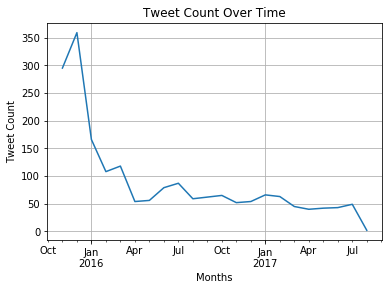

In [172]:
#convert timestamp to datetime as it seemed storing the masterfile as csv changed the datatype
df.timestamp = pd.to_datetime(df.timestamp)
df['Month_year'] = df.timestamp.dt.to_period('M');
df['Month_year'].value_counts().sort_index().plot();
plt.grid();
plt.xlabel('Months');
plt.ylabel('Tweet Count');
plt.title('Tweet Count Over Time');

Tweet counts have been declining with a steep drop from late 2015 to early 2016.

#### 2. Is there a correlation between ratings, favorites, and retweets?

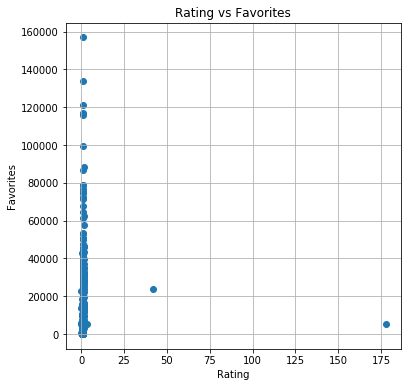

In [173]:
plt.figure(figsize = (6,6));
plt.scatter(df.rating, df.favorites);
plt.grid();
plt.xlabel('Rating');
plt.ylabel('Favorites');
plt.title('Rating vs Favorites');

In [174]:
#remove outliner
df_out = df.query('rating < 25').copy()

In [175]:
#confirmed outlier removed
df_out.describe()

,tweet_id,prediction_confidence,retweets,favorites,WeRateDogs_followers,rating
count,1.962000e+03,1962.000000,1962.000000,1962.000000,1.962000e+03,1962.000000
mean,7.358413e+17,0.594213,2479.266565,8352.803772,8.764340e+06,1.054973
std,6.745958e+16,0.272037,4436.434419,12285.082100,7.898799e+01,0.223346
min,6.660209e+17,0.044333,11.000000,71.000000,8.764297e+06,0.000000
25%,6.758475e+17,0.362857,554.000000,1789.000000,8.764304e+06,1.000000
50%,7.087246e+17,0.587440,1199.000000,3776.500000,8.764342e+06,1.100000
75%,7.877873e+17,0.847216,2829.750000,10372.750000,8.764350e+06,1.200000
max,8.924206e+17,1.000000,78200.000000,156933.000000,8.765088e+06,3.428571


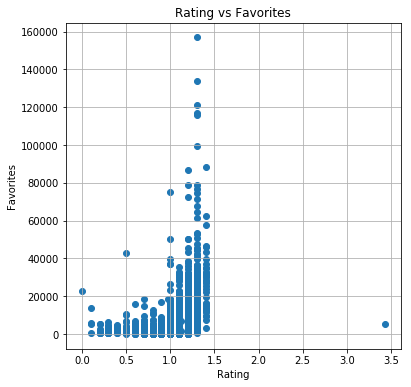

In [176]:
plt.figure(figsize = (6,6));
plt.scatter(df_out.rating, df_out.favorites);
plt.grid();
plt.xlabel('Rating');
plt.ylabel('Favorites');
plt.title('Rating vs Favorites');

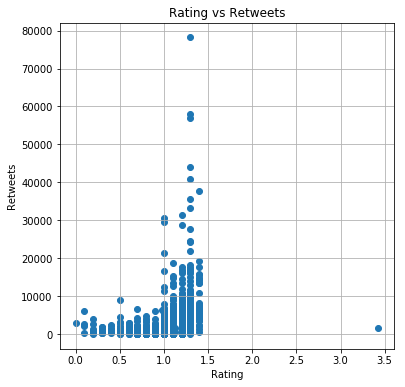

In [177]:
plt.figure(figsize = (6,6));
plt.scatter(df_out.rating, df_out.retweets);
plt.grid();
plt.xlabel('Rating');
plt.ylabel('Retweets');
plt.title('Rating vs Retweets');

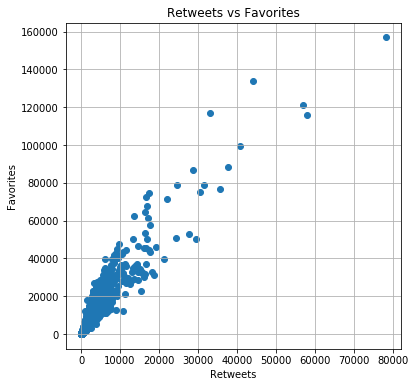

In [178]:
plt.figure(figsize = (6,6));
plt.scatter(df_out.retweets, df_out.favorites);
plt.grid();
plt.xlabel('Retweets');
plt.ylabel('Favorites');
plt.title('Retweets vs Favorites');

As expected, there is a very strong positive correlation between Retweets and Favorites. There's also a strong positive correlation between rating to the number of retweets and favorites. 

#### 3. Of the tweets predictions of over 85% prediction confidence, what are the top 20 most tweeted dog breeds? What breed or things have the top 20 average ratings?

In [179]:
df_p = df_out.query('prediction_confidence > 0.85').copy()
df_p.describe()

,tweet_id,prediction_confidence,retweets,favorites,WeRateDogs_followers,rating
count,4.850000e+02,485.000000,485.000000,485.000000,4.850000e+02,485.000000
mean,7.414329e+17,0.943729,2713.167010,9183.923711,8.764344e+06,1.073517
std,6.913800e+16,0.045769,3840.846046,11951.385234,1.015665e+02,0.244876
min,6.660519e+17,0.850050,29.000000,138.000000,8.764297e+06,0.000000
25%,6.766034e+17,0.905972,629.000000,2149.000000,8.764303e+06,1.000000
50%,7.170475e+17,0.953071,1383.000000,4486.000000,8.764342e+06,1.100000
75%,7.954003e+17,0.985649,3354.000000,12306.000000,8.764350e+06,1.200000
max,8.900066e+17,1.000000,33108.000000,116876.000000,8.765087e+06,3.428571


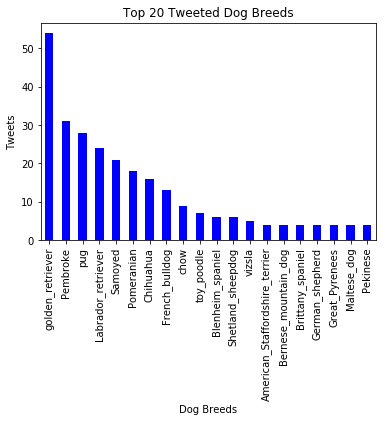

In [180]:
df_p.query('whether_dog == True').groupby('prediction').count().tweet_id.nlargest(20).plot(kind = 'bar', color = 'blue');
plt.xlabel('Dog Breeds');
plt.ylabel('Tweets');
plt.title('Top 20 Tweeted Dog Breeds');

In [181]:
#tweet subject with top 20 average ratings
Top_20 = pd.DataFrame({'Avg_rating' : df_p.groupby(['prediction', 'whether_dog']).mean().rating.nlargest(20)}).reset_index()

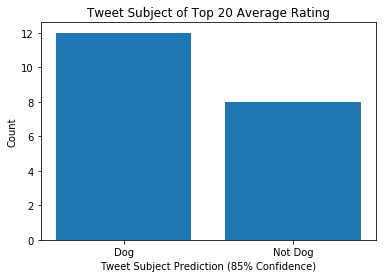

In [182]:
#number of tweet subject of top average rating are predicted as dogs
dog = Top_20.whether_dog.sum()

plt.bar(["Dog", "Not Dog"], [dog, Top_20.shape[0]-dog])
plt.title("Tweet Subject of Top 20 Average Rating")
plt.xlabel("Tweet Subject Prediction (85% Confidence)")
plt.ylabel("Count");

Of the predictions with over 85% confidence, the most tweeted dog breed is the golden retriever that has almost double the tweet count of the second most tweeted dog breed. When we look at the top 20 average rating, 12 of them are dogs whereas 8 of them are not. Why would WeRateDog rate non-dog tweets this high?

#### 4. Is there a correlation between ratings and providing a dog name?

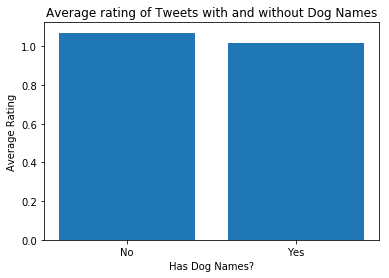

In [183]:
# get the average rating of tweets with dog names and tweets without dog names
With_name = df_out.query('name == "None"').rating.mean()
Wo_name = df_out.query('name != "None"').rating.mean()

plt.bar(["Yes", "No"], [With_name, Wo_name])
plt.title("Average rating of Tweets with and without Dog Names")
plt.xlabel("Has Dog Names?")
plt.ylabel("Average Rating");

Including the dog name(s) does not seem to have strong correlation on rating as average rating for tweets with names and without names are close to one another. Further hypothesis testing is needed to identify any statistical significance of including dog names in the tweet